In [1]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from random import shuffle

# Get the data


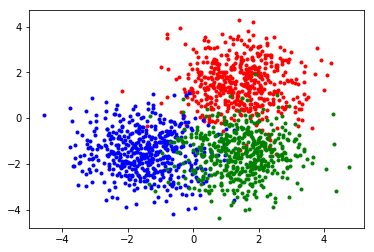

In [2]:
nf = 2
nClass = 3

Xred   = torch.randn(2,500)  + 3.0/2*torch.ones(2,500)
Xblue  = torch.randn(2,500)  - 3.0/2*torch.ones(2,500)
Xgreen = torch.randn(2,500)
Xgreen[0,:] = Xgreen[0,:] + 3.0/2
Xgreen[1,:] = Xgreen[1,:] - 3.0/2

plt.plot(Xred[0,:].numpy(),Xred[1,:].numpy(),'.r')
plt.plot(Xblue[0,:].numpy(),Xblue[1,:].numpy(),'.b')
plt.plot(Xgreen[0,:].numpy(),Xgreen[1,:].numpy(),'.g')


X = torch.cat([Xred.t(),Xblue.t(),Xgreen.t()]).t()
C = torch.zeros(1500,dtype = torch.int64)
C[500:1000] = 1
C[1000:1500] = 2

# Shuffle the data and labels
ind = torch.randperm(1500)

X = X[:,ind]
C = C[ind]



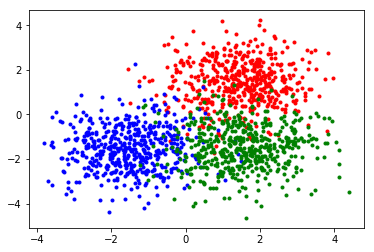

In [4]:
# Get a validation set
XredVal   = torch.randn(2,500)  + 3.0/2*torch.ones(2,500)
XblueVal  = torch.randn(2,500)  - 3.0/2*torch.ones(2,500)
XgreenVal = torch.randn(2,500)
XgreenVal[0,:] = XgreenVal[0,:] + 3.0/2
XgreenVal[1,:] = XgreenVal[1,:] - 3.0/2


plt.plot(XredVal[0,:].numpy(),XredVal[1,:].numpy(),'.r')
plt.plot(XblueVal[0,:].numpy(),XblueVal[1,:].numpy(),'.b')
plt.plot(XgreenVal[0,:].numpy(),XgreenVal[1,:].numpy(),'.g')


XVal = torch.cat([XredVal.t(),XblueVal.t(),XgreenVal.t()]).t()
CVal = torch.zeros(1500,dtype = torch.int64)
CVal[500:1000] = 1
CVal[1000:1500] = 2

# Shuffle the data and labels
ind = torch.randperm(1500)
XVal = XVal[:,ind]
CVal = C[ind]


# Find a separating hyperplane

In [5]:
lossFunc = nn.CrossEntropyLoss()

def misfit(X,W,bias,C):
    n = W.shape
    X = X.view(n[1],-1)
    S = torch.matmul(W,X) + bias.unsqueeze(1)
    return lossFunc(S.t(),C) 


In [6]:
class linNet(nn.Module):

    def __init__(self):
        super().__init__()
        
    def forward(self,x):
    
        return x 
        

In [7]:
# weights for linear classifier    
W     = nn.Parameter(torch.randn(nClass,nf)*1e-3,requires_grad=True)
b     = nn.Parameter(torch.randn(nClass)*1e-2,requires_grad=True)

In [8]:
# Generate our network
net   = linNet()

# See that it runs

In [9]:
# run the network
x = net(X)
label = torch.randint(0,3,(500,),dtype=torch.long)
loss = misfit(x[:,0:500],W,b,label)
print('Initial loss = ', loss.detach().numpy())    
print('Sanity Check = ',np.log(3.0))


Initial loss =  1.0987242
Sanity Check =  1.0986122886681098


In [10]:
loss.backward()
print(b.grad)
print(torch.norm(W.grad))

tensor(1.00000e-02 *
       [ 0.4788,  3.0178, -3.4966])
tensor(0.1186)


In [11]:
import torch.optim as optim
optimizer = optim.SGD([{'params': W, 'lr':1e-3},{'params': b, 'lr':1e-3}], momentum=0.0)

# First use gradient descent

In [12]:
Wopt    = W
bopt    = b
lossOld = 1e10

for epoch in range(200):  # loop over the dataset multiple times

    # zero the parameter gradients
    optimizer.zero_grad()

    for i in range(X.shape[1]):
        # get the inputs
        inputs = X[:,i:i+1]
        labels = C[i:i+1]
        
        # forward 
        x      = net(inputs)
        lossi = misfit(x,W,b,labels)
        if i==0:
            loss = lossi
        else:
            loss  += lossi
     
    loss.backward()
    optimizer.step()

    if loss < lossOld:
        Wopt    = W
        bopt    = b

    g = torch.norm(W.grad) + torch.norm(b.grad)
    # print statistics
    print('%d  %.3f   %.3f'% (epoch+1, loss, g))

print('Finished Training')
W = Wopt
b = bopt

1  1648.350   1716.331
2  452.135   208.089
3  424.419   163.676
4  407.143   134.230
5  395.291   113.277
6  386.676   97.572
7  380.156   85.338
8  375.074   75.524
9  371.022   67.469
10  367.730   60.738
11  365.014   55.028
12  362.746   50.127
13  360.833   45.875
14  359.202   42.157
15  357.802   38.881
16  356.591   35.978
17  355.537   33.394
18  354.615   31.085
19  353.804   29.017
20  353.087   27.165
21  352.452   25.507
22  351.886   24.027
23  351.379   22.710
24  350.925   21.538
25  350.517   20.494
26  350.148   19.558
27  349.815   18.711
28  349.514   17.937
29  349.239   17.225
30  348.989   16.565
31  348.760   15.950
32  348.552   15.373
33  348.361   14.832
34  348.186   14.321
35  348.024   13.838
36  347.876   13.381
37  347.738   12.947
38  347.612   12.534
39  347.495   12.141
40  347.386   11.766
41  347.286   11.408
42  347.192   11.065
43  347.106   10.738
44  347.025   10.424
45  346.950   10.123
46  346.879   9.833
47  346.814   9.556
48  346.753   9.2

In [13]:
print(W)
print(b)

Parameter containing:
tensor([[ 1.0234,  2.0803],
        [-1.9739, -1.0707],
        [ 0.9479, -1.0110]])
Parameter containing:
tensor(1.00000e-02 *
       [ 7.3513, -3.8905, -3.8310])


# Plot the results

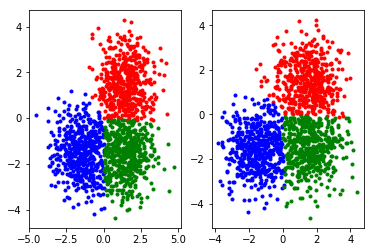

In [14]:
tmp = torch.matmul(W,X) + b.unsqueeze(1)
_,Cpred = torch.max(tmp,dim=0)

indRed   = (Cpred==0).nonzero()
indBlue  = (Cpred==1).nonzero()
indGreen = (Cpred==2).nonzero()

plt.subplot(1,2,1)
plt.plot(X[0,indRed].numpy(),X[1,indRed].numpy(),'.r')
plt.plot(X[0,indBlue].numpy(),X[1,indBlue].numpy(),'.b')
plt.plot(X[0,indGreen].numpy(),X[1,indGreen].numpy(),'.g')

# Test on validation
tmp = torch.matmul(W,XVal) + b.unsqueeze(1)
_,Cpred = torch.max(tmp,dim=0)

indRed   = (Cpred==0).nonzero()
indBlue  = (Cpred==1).nonzero()
indGreen = (Cpred==2).nonzero()
plt.subplot(1,2,2)
plt.plot(XVal[0,indRed].numpy(),XVal[1,indRed].numpy(),'.r')
plt.plot(XVal[0,indBlue].numpy(),XVal[1,indBlue].numpy(),'.b')
plt.plot(XVal[0,indGreen].numpy(),XVal[1,indGreen].numpy(),'.g')





# Use Stochastic Gradient Descent

In [15]:
# weights for linear classifier    
W     = nn.Parameter(torch.randn(nClass,nf)*1e-3,requires_grad=True)
b     = nn.Parameter(torch.randn(3)*1e-2,requires_grad=True)

import torch.optim as optim
optimizer = optim.SGD([{'params': W, 'lr':1e-1},{'params': b, 'lr':1e-1}], momentum=0)

In [16]:
for epoch in range(30):  # loop over the dataset multiple times

    # zero the parameter gradients
    g = 0.0
    loss = 0.0
    for i in range(X.shape[1]):
        
        optimizer.zero_grad()
        # get the inputs
        inputs = X[:,i:i+1].unsqueeze(0)
        labels = C[i:i+1]

        # forward 
        x      = net(inputs)
        lossi = misfit(x,W,b,labels)
        if i==0:
            loss = lossi
        else:
            loss  += lossi
            
        lossi.backward()
        optimizer.step()
        g += torch.norm(W.grad) + torch.norm(b.grad)    
     
    print('%d  %.3f   %.3f'% (epoch+1, loss, g))

print('Finished Training')

1  385.966   875.855
2  374.841   770.895
3  375.184   767.734
4  375.236   767.312
5  375.244   767.249
6  375.245   767.239
7  375.245   767.237
8  375.246   767.237
9  375.246   767.237
10  375.246   767.237
11  375.246   767.237
12  375.246   767.237
13  375.246   767.237
14  375.246   767.237
15  375.246   767.237
16  375.246   767.237
17  375.246   767.237
18  375.246   767.237
19  375.246   767.237
20  375.246   767.237
21  375.246   767.237
22  375.246   767.237
23  375.246   767.237
24  375.246   767.237
25  375.246   767.237
26  375.246   767.237
27  375.246   767.237
28  375.246   767.237
29  375.246   767.237
30  375.246   767.237
Finished Training


In [17]:
print(W)
print(b)

Parameter containing:
tensor([[ 1.0048,  2.2891],
        [-2.3355, -1.1139],
        [ 1.3309, -1.1728]])
Parameter containing:
tensor([ 0.0774, -0.1616,  0.0926])


# Plot the results

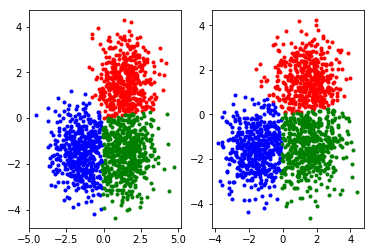

In [18]:
tmp = torch.matmul(W,X) 
tmp += b.unsqueeze(1)
_,Cpred = torch.max(tmp,dim=0)

indRed   = (Cpred==0).nonzero()
indBlue  = (Cpred==1).nonzero()
indGreen = (Cpred==2).nonzero()

plt.subplot(1,2,1)
plt.plot(X[0,indRed].numpy(),X[1,indRed].numpy(),'.r')
plt.plot(X[0,indBlue].numpy(),X[1,indBlue].numpy(),'.b')
plt.plot(X[0,indGreen].numpy(),X[1,indGreen].numpy(),'.g')

# Test on validation
tmp = torch.matmul(W,XVal) + b.unsqueeze(1)
_,Cpred = torch.max(tmp,dim=0)

indRed   = (Cpred==0).nonzero()
indBlue  = (Cpred==1).nonzero()
indGreen = (Cpred==2).nonzero()

plt.subplot(1,2,2)
plt.plot(XVal[0,indRed].numpy(),XVal[1,indRed].numpy(),'.r')
plt.plot(XVal[0,indBlue].numpy(),XVal[1,indBlue].numpy(),'.b')
plt.plot(XVal[0,indGreen].numpy(),XVal[1,indGreen].numpy(),'.g')

